In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 # to load in images
%matplotlib inline

In [289]:
tf.compat.v1.disable_eager_execution()

In [292]:
ae = tf.keras.models.load_model('./vae_model.h5')

SystemError: unknown opcode

In [218]:
encoder = tf.keras.models.Model(inputs=ae.input, outputs=ae.get_layer(name='encoder_output').output)

(2312, 1490, 3)

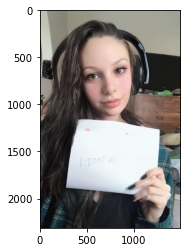

In [280]:
img = cv2.imread('./faces/hupef4.png')
plt.imshow(to_rgb(img))
img.shape

In [254]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

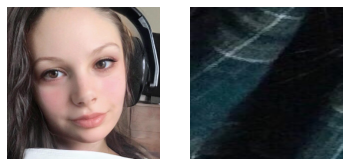

In [281]:
def detect_faces(img, extension=(0,0), resize=(256,256), draw_rects=True):
    img_gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) # cvt to grayscale for faster results
    
    if type(extension)==float or type(extension)==int:
        extension = (extension, extension)
    if extension[0]<1 or extension[1]<1:
        extension = (int(extension[0]*len(img[0])), int(extension[1]*len(img))) # if <1, treat as a perecentage
    
    faces_rects = haar_cascade_face.detectMultiScale(img_gray, scaleFactor = 1.2, minNeighbors = 5)
    if len(faces_rects) == 0:
        return None, None
    if draw_rects: # should we draw the rectangles onto the original image?
        for (x,y,w,h) in faces_rects:
            left_x = int(max(x-extension[0]/2,0))
            right_x = int(min(x+(extension[0]/2)+w,len(img[0])))
            top_y = int(max(y-extension[1]/2,0))
            bottom_y = int(min(y+(extension[1]/2)+h, len(img)))
            cv2.rectangle(img_gray, (left_x,bottom_y), (right_x,top_y), (0, 255, 0), 10)
    face_imgs = []
    for (x,y,w,h) in faces_rects:
        left_x = int(max(x-extension[0]/2,0))
        right_x = int(min(x+(extension[0]/2)+w,len(img[0])))
        bottom_y = int(max(y-extension[1]/2,0))
        top_y = int(min(y+(extension[1]/2)+h, len(img)))
        img_slice = img[bottom_y:top_y, left_x:right_x]
        face_imgs.append(cv2.resize(img_slice,resize))
    return face_imgs, img_gray

def to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def display_faces(imgs):
    if imgs is not None:
        for c,face in enumerate(imgs):
            plt.subplot(1,len(imgs),c+1)
            plt.axis('off')
            plt.imshow(to_rgb(face))
    else:
        print('Face not found!')
        
face_imgs, im_gray = detect_faces(img, extension=.1, draw_rects=True)  
display_faces(face_imgs)

In [282]:
img = to_rgb(face_imgs[0])

In [283]:
def encode_vals(img):
    img = img / 255.
    img = img.reshape((1, 256, 256, 3))
    return encoder.predict(img)[0]

def autoencoder_predict(img):
    img = img / 255.
    img = img.reshape((1, 256, 256, 3))
    return ae.predict(img)[0]

In [284]:
encode_vals(img)

array([-1.1017754 , -2.339439  ,  1.1642296 ,  1.178031  , -0.21709463,
        2.1743295 ,  2.5020285 ,  2.0601892 ,  0.7085853 , -0.96240836,
        0.1443803 , -1.2109112 ,  2.388383  , -3.0942976 , -0.4763611 ,
       -1.2463043 , -1.6736232 ,  0.5773548 , -0.28386128, -1.3132689 ,
       -0.17178553, -0.5269864 ,  0.8090005 , -0.09742538,  2.1548069 ,
        1.119124  ,  0.30369455,  0.21045154, -0.21991128, -1.7439163 ,
       -2.5211823 ,  0.93990743, -2.631543  , -1.210937  , -1.8562212 ,
        1.063378  , -1.1415464 , -1.1303743 ,  0.98653334, -0.4654085 ,
        1.6666975 , -1.7445104 ,  2.465995  ,  0.29778114,  2.2766714 ,
        1.3418238 , -0.26104838, -0.9718818 ,  1.1227161 , -0.2857586 ,
       -1.6574638 ,  0.8581507 ,  2.702113  ,  2.0421164 , -1.8405185 ,
        1.3972216 , -0.02064676, -1.4550732 ,  0.61980426, -0.57442427,
       -0.57968646, -2.3908744 , -1.8507019 , -0.04070269,  3.568045  ,
        0.00998813, -0.11780474,  1.1985836 ,  1.0528206 , -0.91

In [285]:
type(.2)

float

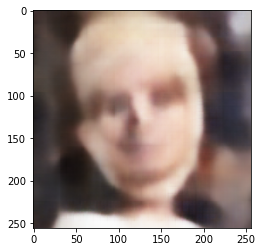

In [286]:
plt.imshow(autoencoder_predict(img))